### PREDICTING FUTURE WEEKLY SALES OF WALMART STORES USING REGRESSION#


### BRIEF DESCRIPTION OF PREDICTIVE MODEL TO BE BUILT USING REGRESSION

This model is going to be built using three datasets all provided from Walmart for their 45 stores from 5th February, 2010 (2010-02-05) to 1st November, 2011 (2011-11-1). These are to help see the trends in their weekly sales, and if any patterns such as Holidays affects the sales, negatively or positively, or even the temperature of a certain week. Once this is noted, a regression model is going to be built that can be used to predict their future weekly sales given a set of attributes.

In [1]:
## IMPORTING OF LIBRARIES WHICH CONTAINS USEFUL FUNCTIONS TO HELP MAKE CODE AND WORK MUCH EASIER

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for attractive data visualisation
import matplotlib.pyplot as plt # for plots
from sklearn.model_selection import train_test_split #for splitting training and test data
from sklearn.tree import DecisionTreeRegressor #for building decision tree regressor model
from sklearn.linear_model import LinearRegression #for buidling linear regression model


<b><i>A brief description of the datasets can be found below:</i></b> <br><br> (1) <b>data</b> - This contains The weekly sales of each department in the 45 Walmart stores, and whether that week had a holiday in it or not. This is to enable us know whether sales for each week were affected by Holidays or not, whether the sales shot up or went down. <br><br> (2) <b>features</b> - This contains additional information, related to a particular store, the department and the regional activity for a particular week, such as the average temperature and whether the store had a promotion going on that week or not, the promotions are represented as Markdowns, and weeks without any promotions are represented as blank (missing data) <br><br> (3) <b>stores</b> - This contains the data of all 45 stores of Walmart, the type of shop and size 

#### DATA SOURCES ####

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Airdmhund/walmartdata/master/train.csv")
features = pd.read_csv("https://raw.githubusercontent.com/Airdmhund/walmartdata/master/features.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/Airdmhund/walmartdata/master/stores.csv")

- ##### VIEWING STRUCTURE OF EACH DATASET #####

- "data" Dataset with the number of rows and columns

In [3]:
num_rows,num_columns = data.shape
print("Number of Rows : " ,num_rows,"\nNumber of Columns : ",num_columns) ##Number of rows and columns in dataset
data.head()

Number of Rows :  421570 
Number of Columns :  5


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


- "features" Dataset with the number of rows and columns

In [4]:
num_rows1,num_columns1 = features.shape
print("Number of Rows : " ,num_rows1,"\nNumber of Columns : ",num_columns1)  ##Number of rows and columns in dataset

features.head()

Number of Rows :  8190 
Number of Columns :  12


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


- "stores" Dataset with the number of rows and columns

In [5]:
num_rows2,num_columns2 = stores.shape
print("Number of Rows : " ,num_rows2,"\nNumber of Columns : ",num_columns2) ##Number of rows and columns in dataset
stores.head()

Number of Rows :  45 
Number of Columns :  3


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#### LINKING AND INTEGRATING DATASETS INTO ONE FULL DATAFRAME (DATA INTEGRATION)
To be able to work with the full dataset and see all the patterns, trends and necessary features, all three tables are going to be combined into one dataset (named "dataset") using the merge function from pandas. All three datasets have a unique key, which is the store numer ['Store']. This will help and make it able to merge all the datasets together.

- Firstly, the "data" and "features" dataframe will be combined using the "Store" and "Date" Columns. Since these two are present in both tables, it will be the best key to combine both. However, these two dataframes also have "IsHoliday" column. In order to reduce redundancy of the columns, it will be removed from one of the dataframes. I will have it removed from the "features" dataframe and joined using the left join, to get all the rows in data and only the intersection from features. This is done with command below<br> 

In [6]:
##FIRST DROP THE "IsHoliday" attribute from the features dataframe.
features = features.drop('IsHoliday',axis=1)
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [7]:
##Merging the dataframes, "data" and "feature" 
dataset = pd.merge(data,features, on=['Store','Date'], how='left')

#Checking number of rows and columns for the two joined dataframes
num_rows3,num_columns3 = dataset.shape
print("Number of Rows : " ,num_rows3,"\nNumber of Columns : ",num_columns3) ##Number of rows and columns in dataset
dataset.head()

Number of Rows :  421570 
Number of Columns :  14


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


The successful execution of the above shows that the two tables have been merged successfully, this is confirmed by the number of rows and columns printed out
- Secondly, the combined two dataframes named "dataset" will now be joined with the third dataset, "stores", using column "Store" as unique key, which both tables have.

In [8]:
#Merging dataset and stores dataframe
dataset = pd.merge(dataset,stores, on='Store', how='left')

#Checking number of rows and columns
num_rows4,num_columns4 = dataset.shape
print("Number of Rows : " ,num_rows4,"\nNumber of Columns : ",num_columns4) ##Number of rows and columns in dataset
dataset.head()

Number of Rows :  421570 
Number of Columns :  16


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


All three dataframes have now been successfully integrated into one dataframe, "dataset" having 421570 rows and 16 columns. Now I proceed to the processing and exploration of my dataset

## DATA PRE-PROCESSING / EXPLORATION / MANIPULATION

####  - Describing the data

This is done so I can view some basic statistical details like percentile, mean, std etc. of the dataset I'm working with.

In [9]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


####  - Checking Data type of each feature


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


#### - EXTRACTING DATE FEATURE, WHICH IS CURRENTLY AN OBJECT DATATYPE, CONVERTING IT TO A DATETIME TYPE AND SEPARATING IT INTO DAY, MONTH AND YEAR

In [11]:
##Converting the Date Object into a datetime type
dataset['Date'] = pd.to_datetime(dataset['Date'])

##Extracting only the year from the date and putting it in a new column as "year"
dataset['year']=dataset['Date'].dt.year

##Extracting only the month from the date and putting it in a new column as "month"
dataset['month']=dataset['Date'].dt.month

##Extracting only the day from the date and putting it in a new column as "day"
dataset['day']=dataset['Date'].dt.day

##Deleting the date object from the original table as the important details have been extracted 
##And keeping the original 'Date' feature into a new variable as this *may* be used later on
original_date = dataset['Date']
del dataset['Date']


##CONFIRMATION BELOW SHOWING DATE FEATURE HAS BEEN TAKEN OUT AND REPRESENTED BY DAY,MONTH AND YEAR RESPECTIVELY
dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,day
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
1,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,12
2,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,19
3,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,26
4,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,5


### Finding Missing Values in the Data

Finding any missing values in the data and treating them is very important as it may affect or reduce the quality of the performance metric

In [12]:
dataset.isnull().any()

Store           False
Dept            False
Weekly_Sales    False
IsHoliday       False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI             False
Unemployment    False
Type            False
Size            False
year            False
month           False
day             False
dtype: bool

The above command and output tells us that there are missing values in the data and these are in the attributes MarkDown 1 - 5. The command below will reveal the number of missing values present in those attributes

In [13]:
dataset.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
year                 0
month                0
day                  0
dtype: int64

### Percentage of Missing Values

In [14]:
##finding the percentage the missing values accounts for in the data
missing_percentage = dataset.isnull().sum()*100/len(dataset)
data_type = dataset.dtypes

feat_summary = pd.DataFrame({"Percent_missing %": missing_percentage.round(2), 
                               "Datatypes": data_type})

feat_summary

,Percent_missing %,Datatypes
Store,0.00,int64
Dept,0.00,int64
Weekly_Sales,0.00,float64
IsHoliday,0.00,bool
Temperature,0.00,float64
Fuel_Price,0.00,float64
MarkDown1,64.26,float64
MarkDown2,73.61,float64
MarkDown3,67.48,float64
MarkDown4,67.98,float64


The MarkDowns being represented by the missing values <i>(which account for about 67% of missing data)</i> are actually not missing values that weren't captured. They represent promotions that were done or not done. Promotions not being done was recorded as blank, but for the purpose of this project, all the missing values will be replaced with zero, to show that there were no promotions. Below command is used to replace them with zeros.

In [15]:
##Replacing missing values with 0
dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

All the Missing values have been replaced with zero(0). Running the previous command again, confirms all missing values have been treated:

In [16]:
dataset.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
year            0
month           0
day             0
dtype: int64

#### ALL THE MISSING VALUES HAVE BEEN TREATED NOW WITH CONFIRMATION BELOW

In [17]:
dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,day
0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
1,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,12
2,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,19
3,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,26
4,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,5


## Conversion of Non-Numeric Values to Numeric

The model can only work with Numeric Figures, therefore all values have to be numeric. THe command below will convert the Non-Numeric Features ("IsHoliday","Type") to Numeric:

- Since the values in the 'IsHoliday' column are Boolean, True or False, they can easily be converted into Binary(0 and 1), with 0 representing False and 1 representing True

In [18]:
dataset['IsHoliday'] = [int(convert) for convert in list(dataset.IsHoliday)]
dataset.head()

##Proof of IsHoliday converted to Numerical is found below

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,day
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,12
2,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,19
3,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,26
4,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,5


- The "Type" column will be converted to dummy variables(One Hot Encoding) with command below:

In [19]:
dataset = pd.get_dummies(dataset, columns=['Type'])

##Proof of Type converted to Dummy Variables is found below

In [20]:
dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,year,month,day,Type_A,Type_B,Type_C
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,2010,2,5,1,0,0
1,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,2010,2,12,1,0,0
2,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,2010,2,19,1,0,0
3,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,2010,2,26,1,0,0
4,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,2010,3,5,1,0,0


Dummy variables have been generated and joined successfully and has dropped the previous "Type" Feature. It is now represented by "Type_A" , "Type_B" , "Type_C".

Now that all missing values are handled and there are no unique or wrong characters, I will proceed with visualisation

## Data Visualisation 

 - SCATTER PLOTS
 
 This is to help visualize the correlations between the independent variables and the variable we want to predict(dependent). It will also help to detect any outliers

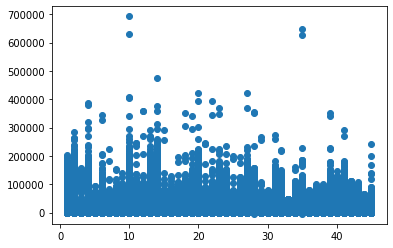

In [22]:
##Relationship  between the Store feature and the Weekly Sales
plt.scatter(dataset['Store'],dataset['Weekly_Sales'])

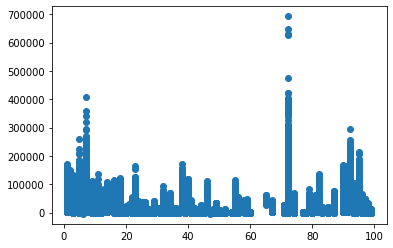

In [23]:
##Relationship  between the Dept feature and the Weekly Sales

plt.scatter(dataset['Dept'],dataset['Weekly_Sales'])

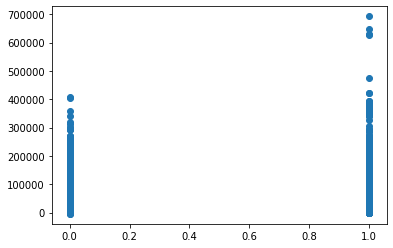

In [24]:
##Relationship between the IsHoliday feature and the Weekly Sales

plt.scatter(dataset['IsHoliday'],dataset['Weekly_Sales'])

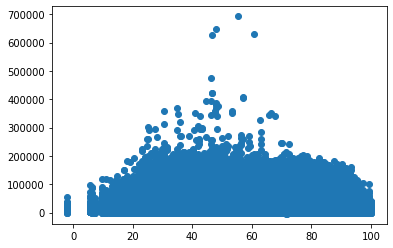

In [25]:
##Relationship between the Temperature feature and the Weekly Sales

plt.scatter(dataset['Temperature'],dataset['Weekly_Sales'])

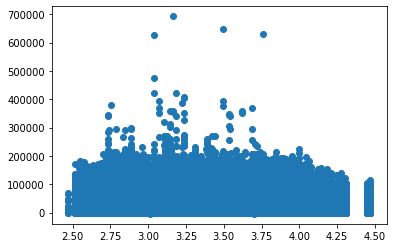

In [26]:
##Relationship between the Fuel_Price feature and the Weekly Sales

plt.scatter(dataset['Fuel_Price'],dataset['Weekly_Sales'])

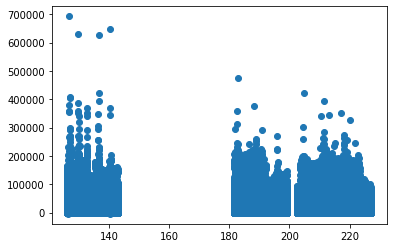

In [27]:
##Relationship between the CPI feature and the Weekly Sales

plt.scatter(dataset['CPI'],dataset['Weekly_Sales'])

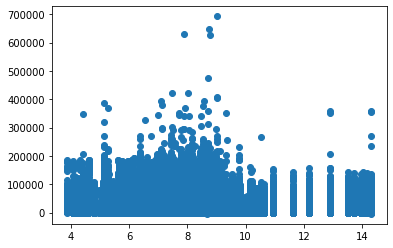

In [28]:
##Relationship between the Unemployment feature and the Weekly Sales

plt.scatter(dataset['Unemployment'],dataset['Weekly_Sales'])

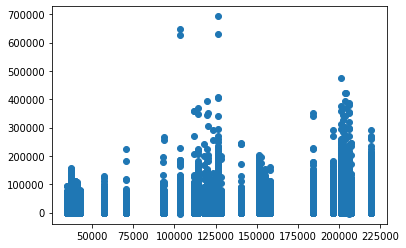

In [29]:
##Relationship between the Size feature and the Weekly Sales

plt.scatter(dataset['Size'],dataset['Weekly_Sales'])

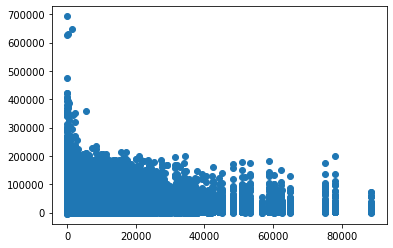

In [30]:
##Relationship between the MarkDown1 feature and the Weekly Sales

plt.scatter(dataset['MarkDown1'],dataset['Weekly_Sales'])

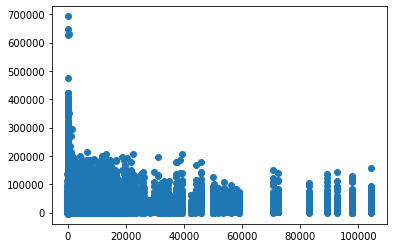

In [31]:
##Relationship between the MarkDown2 feature and the Weekly Sales

plt.scatter(dataset['MarkDown2'],dataset['Weekly_Sales'])

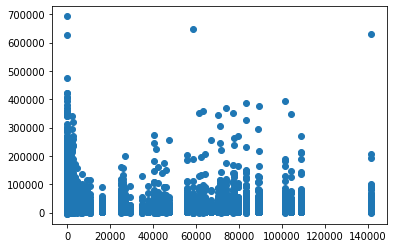

In [32]:
##Relationship between the MarkDown3 feature and the Weekly Sales

plt.scatter(dataset['MarkDown3'],dataset['Weekly_Sales'])

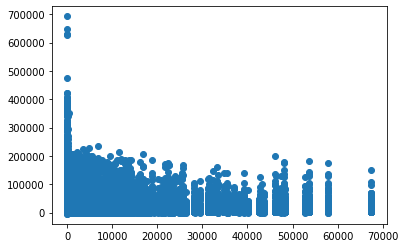

In [33]:
##Relationship between the MarkDown4 feature and the Weekly Sales

plt.scatter(dataset['MarkDown4'],dataset['Weekly_Sales'])

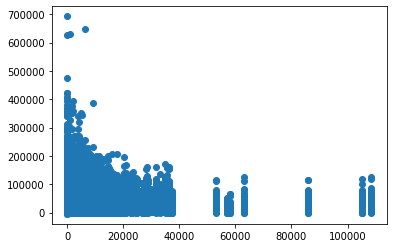

In [34]:
##Relationship between the MarkDown5 feature and the Weekly Sales

plt.scatter(dataset['MarkDown5'],dataset['Weekly_Sales'])

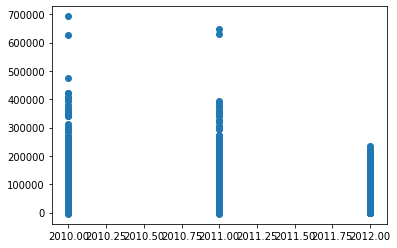

In [35]:
##Relationship between the year feature and the Weekly Sales

plt.scatter(dataset['year'],dataset['Weekly_Sales'])

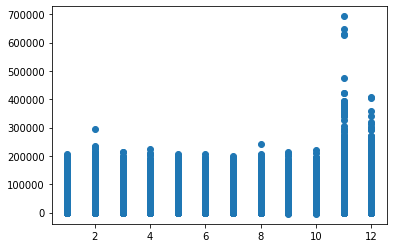

In [36]:
##Relationship between the month feature and the Weekly Sales

plt.scatter(dataset['month'],dataset['Weekly_Sales'])

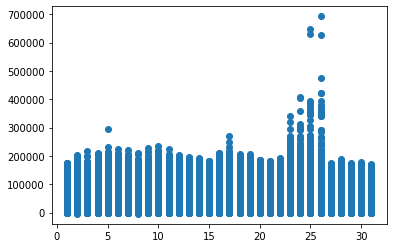

In [37]:
##Relationship between the day feature and the Weekly Sales

plt.scatter(dataset['day'],dataset['Weekly_Sales'])

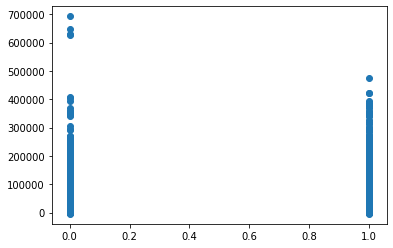

In [38]:
##Relationship between the Type_A feature and the Weekly Sales

plt.scatter(dataset['Type_A'],dataset['Weekly_Sales'])

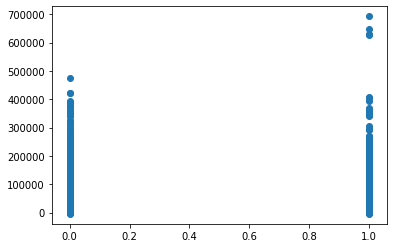

In [39]:
##Relationship between the Type_B feature and the Weekly Sales

plt.scatter(dataset['Type_B'],dataset['Weekly_Sales'])

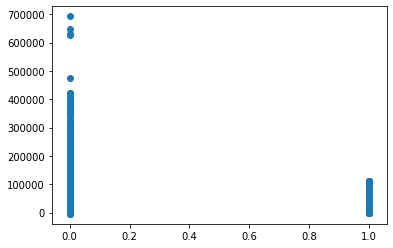

In [40]:
##Relationship between the Type_C feature and the Weekly Sales

plt.scatter(dataset['Type_C'],dataset['Weekly_Sales'])

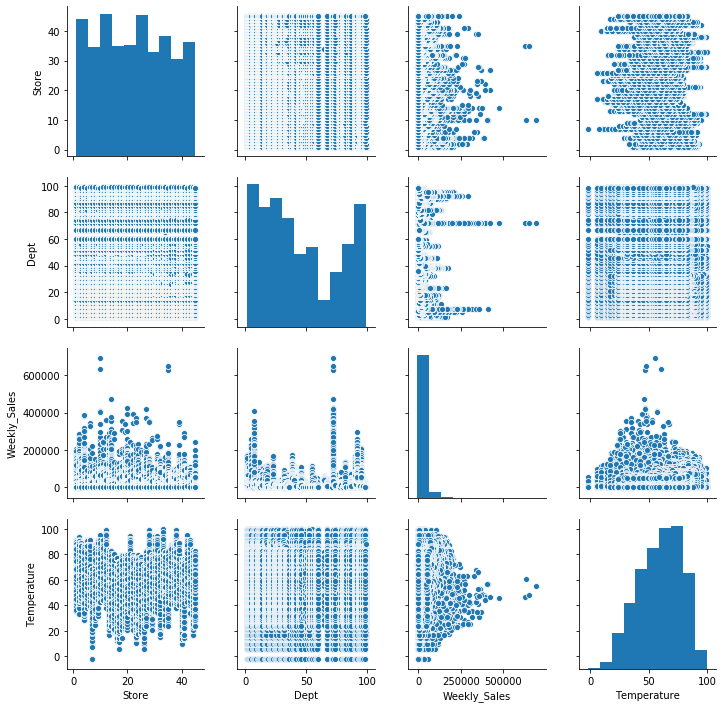

In [26]:
##TOOK ABOUT 3 MINUTES TO PRODUCE
sns.pairplot(dataset, vars=['Store','Dept','Weekly_Sales','Temperature']) 

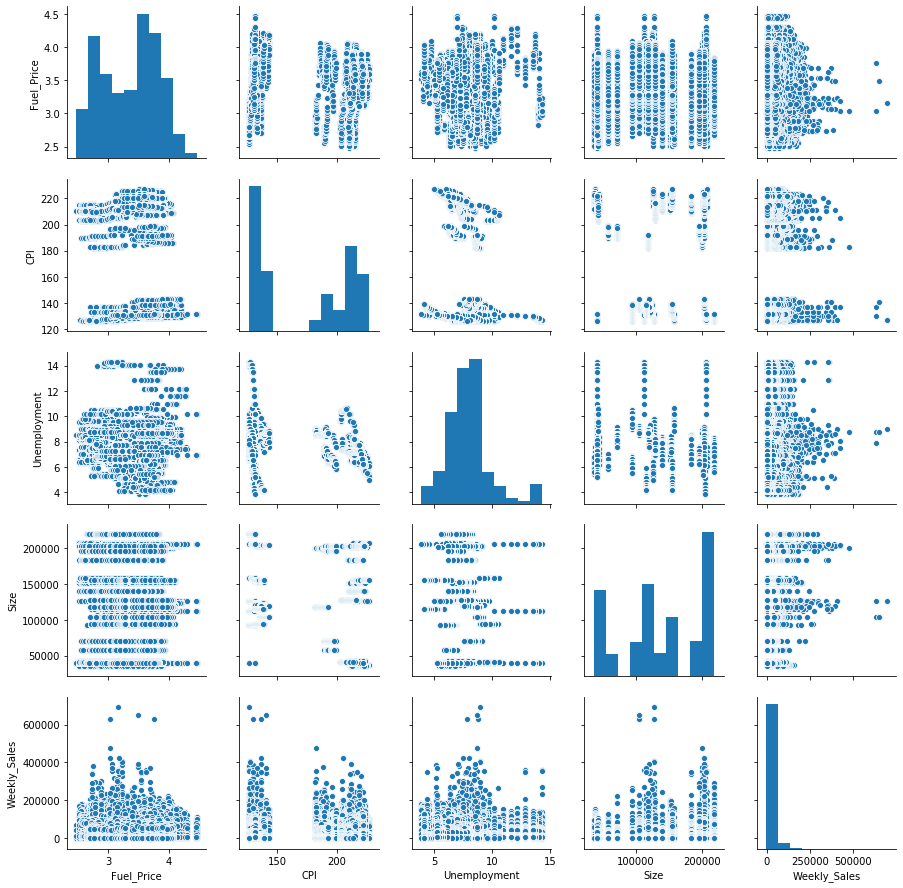

In [27]:
##TOOK ABOUT 5 MINUTES TO PRODUCE
sns.pairplot(dataset, vars=['Fuel_Price','CPI','Unemployment','Size','Weekly_Sales'])

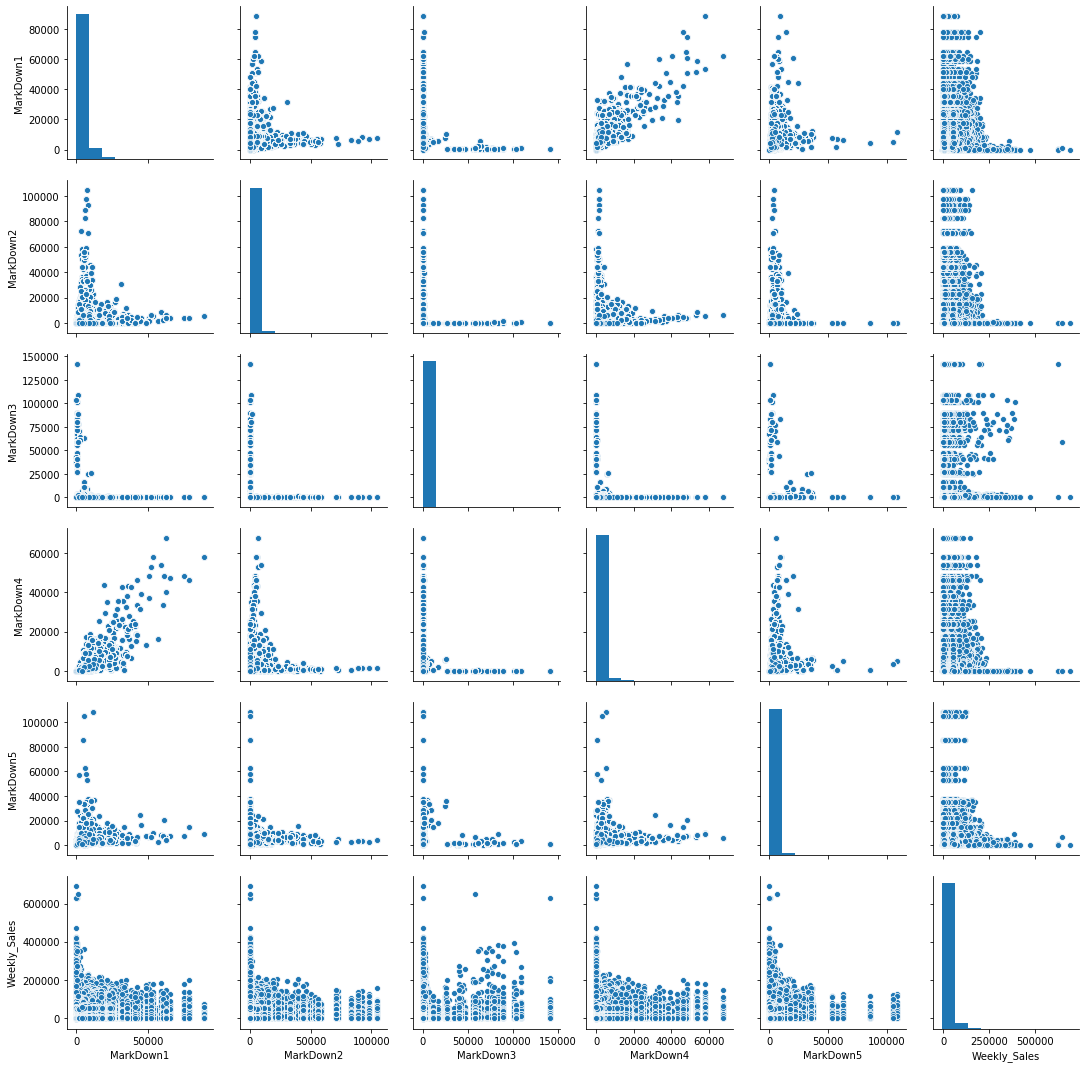

In [28]:
#TOOK ABOUT 5 MINUTES TO PRODUCE
sns.pairplot(dataset, vars=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']) 

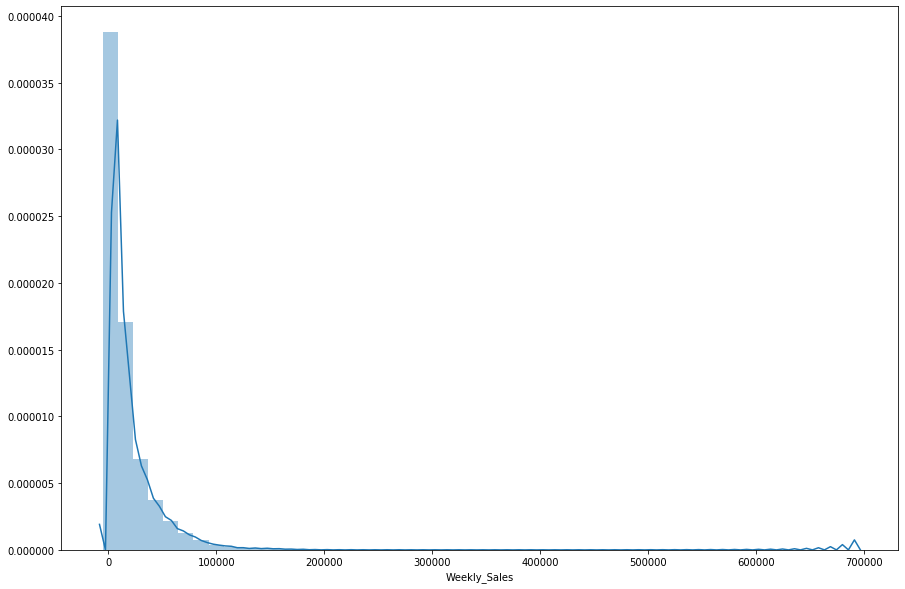

In [41]:
##To see distribution of the target Variable, Weekly_Sales

plt.figure(figsize=(15,10))
sns.distplot(dataset['Weekly_Sales'])


## FEATURE ENGINEERING

#### - CORRELATIONS

A good feature engineering starts with a good understanding about how each of the feature in the dataset affects the output, 'Weekly_Sales'. In other words, how each feature is correlated with the output. Firstly, the heatmap technique will be used to illustrate the correlations the features have with the output, "Weekly_Sales"

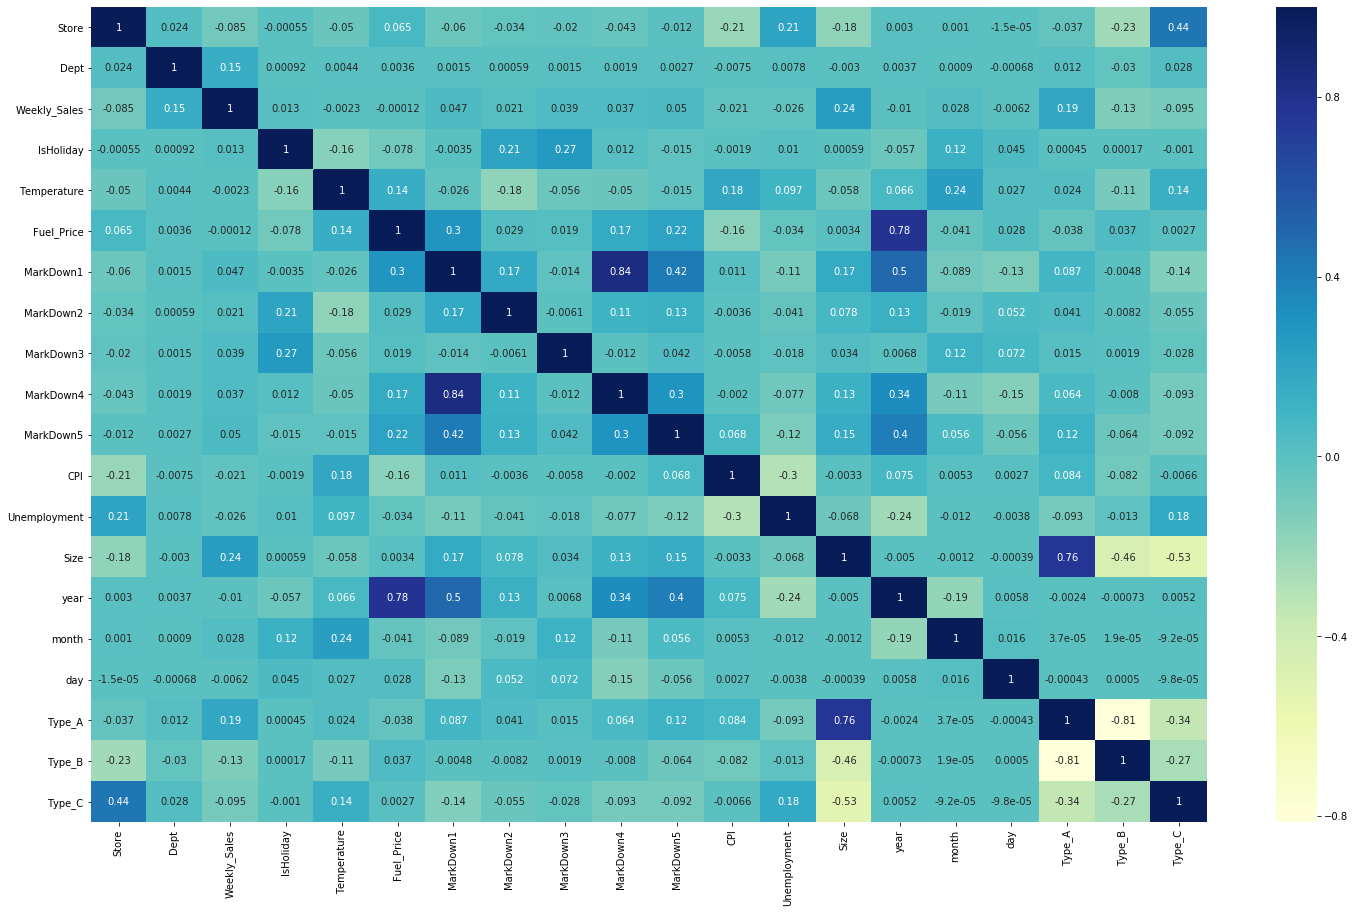

In [21]:
plt.figure(figsize=(25,15))
c= dataset.corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)

By creating a heatmap, it has been noticed that the feature that has the highest correlation with the ouput is 'Size' with a correlation of 0.24, though it still represents a weak correlation, and the rest don't show highly correlated values. From this, it is noticeable that the heatmap alone won't be very good for selecting the most important features for our model. Therefore a Recursive Feature Elimination Method will be applied. This works by recursively removing attributes and building a model on those attributes that remain. 

To start with, the dataset will be divided into an X variable, containing the independent variables(Predictors) and a Y variable(containing the target Variable).

A linear regression model is defined and the Recursive Feature Elimination (RFE) is applied to it to select the best 16 features out of the 19 features. This is done so only the least important features can be taken out <b>*at this stage*</b>. During the next two sections <b>(Model Evaluation)</b>, after the model has been developed, A feature importance plot will be drawn to again see the features which played a role and which did not, to have them eliminated

In [22]:
#Putting independent features into variable X
X = dataset.drop(['Weekly_Sales'],axis=1)

#Putting dependent feature into variable Y
Y = dataset['Weekly_Sales']

In [23]:
##Splitting of data into training and test data, with training data having 80% and test data to have 20%
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

#Number of records and features for training data, both X and Y
print('Training dataset shape:', X_train.shape, y_train.shape)

#Number of records and features for test data, both X and Y
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (337256, 19) (337256,)
Testing dataset shape: (84314, 19) (84314,)


In [24]:
##Building of Linear Regression to which the Recursive Feature Elimination method will be applied to select only 16features
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, 16)
fit = rfe.fit(X, Y)



In [25]:
print("Number of Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Number of Features: 16
Selected Features: [ True  True  True  True  True False False  True False  True  True  True
  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 2 3 1 4 1 1 1 1 1 1 1 1 1 1]


From the above, the best 16 important features have been marked as 'True' in the "Selected Features" and these are also represented as '1' in the "feature ranking". The least important ones are represented as False and any other number from 1 in the selected features and feature ranking respectively.

The columns are displayed below and the ones represented as False and will be dropped(Columns 6,7,9 / MarkDown1,Markdown2 and MarkDown4)

In [26]:
X.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'year', 'month', 'day', 'Type_A', 'Type_B',
       'Type_C'],
      dtype='object')

In [27]:
#Dropping of the 3 least important features
X = X.drop(['MarkDown1','MarkDown2','MarkDown4'],axis=1)

Proof below showing the predictors have now been reduced from 19 to 16 features

In [28]:
##The three features successfully taken out
X.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown3',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'year', 'month', 'day',
       'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

## Model development

In [29]:
## Building of building, starting with again splitting data into train and test dat
X = X
Y = dataset['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)


Training dataset shape: (337256, 16) (337256,)
Testing dataset shape: (84314, 16) (84314,)


## Building different models to choose the best fit model with better accuracy
### Linear Regression Model



In [30]:
from sklearn.metrics import r2_score

##Building of Linear Regression Model with 16 features
linear = LinearRegression()
linear.fit(X_train,y_train)

##Predicting y values using the test data
y_linear_predicted = linear.predict(X_test)

##Scoring Model
acc_linear=linear.score(X_train, y_train)
r2_linear = r2_score(y_test,y_linear_predicted)

print ('Accuracy Score for Linear Regression : ' +str(acc_linear) + ' ~ ' , round(acc_linear * 100, 2) , '%')
print('r2 Score for Linear Regression : ', r2_linear, ' ~ ', round(r2_linear * 100, 2), '%')

##initial r2_score = 9.26


Accuracy Score for Linear Regression : 0.08997725137613422 ~  9.0 %
r2 Score for Linear Regression :  0.0926270513772397  ~  9.26 %


### Random Forest Regressor Model

In [31]:
from sklearn.ensemble import RandomForestRegressor


##Building of Random Forest Regressor with 16 features
random = RandomForestRegressor(n_estimators=100)
random.fit(X_train,y_train)

##Predicting y values using the test data
y_random_predicted = random.predict(X_test)

##Scoring Model
acc_random=random.score(X_train, y_train)
r2_random = r2_score(y_test,y_random_predicted)



print('Accuracy Score for Random Forest Regressor : ' + str(acc_random) + ' ~ ', round(acc_random * 100, 2) , '%')
print ('r2 Score for Random Forest Regressor : ', r2_random, ' ~ ',round(r2_random * 100, 2), '%' )

#initial r2_score = 97.4

Accuracy Score for Random Forest Regressor : 0.9964675876909771 ~  99.65 %
r2 Score for Random Forest Regressor :  0.9744269945816086  ~  97.44 %


### Decision Tree Regressor

In [32]:
##Building of Decision Tree Regressor with 16 features
decision=DecisionTreeRegressor()
decision.fit(X_train,y_train)

##Predicting y values using X test data
y_decision_predicted = decision.predict(X_test)

##Scoring Model
acc_decision=decision.score(X_train, y_train)
r2_decision = r2_score(y_test,y_decision_predicted)



print('Accuracy Score for Decision Tree Regressor : ' + str(acc_decision) + ' ~ ', round(acc_decision * 100, 2) , '%')
print ('r2 Score for Random Forest Regressor : ', r2_decision, ' ~ ',round(r2_decision * 100, 2), '%' )

#initial r2_score = 95.74

Accuracy Score for Decision Tree Regressor : 1.0 ~  100.0 %
r2 Score for Random Forest Regressor :  0.9565230141389898  ~  95.65 %


### MODEL EVALUATION

It can be well observed that Decision Tree Regressor and Random Forest Regressor have better r2 score compared to Linear Regression model and therefore Random Forest Regressor will be the best model for predicting the Weekly Sales as it has a higher r2 Score (97.4 %) than Decision Tree Regressor(95.74 %)

In [33]:
linear_results = pd.DataFrame([['Linear Regression',r2_linear,round(r2_linear*100,2)]],
               columns = ['Model','r2 Score','r2 Score %'])


random_results = pd.DataFrame([['Random Tree Regressor',r2_random,round(r2_random*100,2)]],
               columns = ['Model','r2 Score','r2 Score %'])


decision_results = pd.DataFrame([['Decision Tree Regressor',r2_decision,round(r2_decision*100,2)]],
               columns = ['Model','r2 Score','r2 Score %'])

results = linear_results.append(random_results, ignore_index = True)
results = results.append(decision_results, ignore_index = True)

results

,Model,r2 Score,r2 Score %
0,Linear Regression,0.092627,9.26
1,Random Tree Regressor,0.974427,97.44
2,Decision Tree Regressor,0.956523,95.65


The Random Tree Regressor gave an r2 Score of 97.44%, however, a feature importance plot will be drawn to see and only select the features which matter again and plays an effective role to predicting the Weekly Sales.

NB: 16 features out of the initial 19 features were used to build the current model

### FEATURE IMPORTANCE

This provides a score that indicates how useful or valuable each feature was in the construction of the model

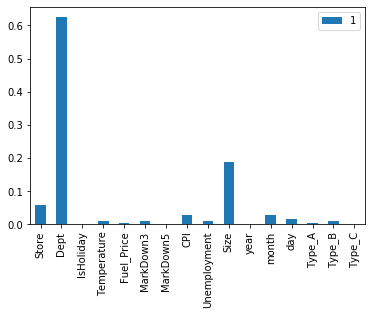

In [34]:
(pd.DataFrame([X.columns,random.feature_importances_],columns=['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown3',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'year', 'month', 'day',
       'Type_A', 'Type_B', 'Type_C']).T).plot.bar()

In [35]:
pd.DataFrame([X.columns,random.feature_importances_],columns=['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown3',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'year', 'month', 'day',
       'Type_A', 'Type_B', 'Type_C']).T

,0,1
Store,Store,0.0573942
Dept,Dept,0.624947
IsHoliday,IsHoliday,0.00234696
Temperature,Temperature,0.0109077
Fuel_Price,Fuel_Price,0.00473678
MarkDown3,MarkDown3,0.0107991
MarkDown5,MarkDown5,0.00185565
CPI,CPI,0.0271205
Unemployment,Unemployment,0.0108016
Size,Size,0.189188


From the above feature importances plot and dataframe displayed, it is clearly seen that the most important feature is "Dept", followed by "Size","Store" and so on. It can also be seen the very least important and have no impact on the model are  "IsHoliday","MarkDown5","year" and "Type_C" ". therefore, A holiday in a week doesn't have an impact with the Weekly Sales. Those 4 features will be dropped, leaving our final features to just 12 features, to rebuild the random forest regressor and recalculate the r2 score

In [36]:
X = X.drop(['IsHoliday','MarkDown5','year','Type_C'],axis=1)
Y = dataset['Weekly_Sales']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)


##Number of features to rebuild model have finally been reduced to just 12 features


Training dataset shape: (337256, 12) (337256,)
Testing dataset shape: (84314, 12) (84314,)


### FINAL REBUILDING OF RANDOM FOREST REGRESSOR WITH 12 FEATURES

In [38]:
##Building of Random Forest Regressor
random = RandomForestRegressor(n_estimators=100)
random.fit(X_train,y_train)

##Predicting y values using X test data
y_random_predicted = random.predict(X_test)

##Scoring Model
acc_random=random.score(X_train, y_train)
r2_random = r2_score(y_test,y_random_predicted)



print('Accuracy Score for Random Forest Regressor : ' + str(acc_random) + ' ~ ', round(acc_random * 100, 2) , '%')
print ('r2 Score for Random Forest Regressor : ', r2_random, ' ~ ',round(r2_random * 100, 2), '%' )

Accuracy Score for Random Forest Regressor : 0.9965041878375874 ~  99.65 %
r2 Score for Random Forest Regressor :  0.9743275538915953  ~  97.43 %


Rebuilding of the Model with just 12 features just increased the r2 score by .01 (97.41, with the previous one being 97.40). However, this shows improvement and that the 4 features that were dropped played no role, and thiscan be used as the final model for predicting the future Weekly Sales

In [39]:
linear_results = pd.DataFrame([['Linear Regression',r2_linear,round(r2_linear*100,2)]],
               columns = ['Model','r2 Score','r2 Score %'])


random_results = pd.DataFrame([['Random Tree Regressor',r2_random,round(r2_random*100,2)]],
               columns = ['Model','r2 Score','r2 Score %'])


decision_results = pd.DataFrame([['Decision Tree Regressor',r2_decision,round(r2_decision*100,2)]],
               columns = ['Model','r2 Score','r2 Score %'])

results = linear_results.append(random_results, ignore_index = True)
results = results.append(decision_results, ignore_index = True)

results

,Model,r2 Score,r2 Score %
0,Linear Regression,0.092627,9.26
1,Random Tree Regressor,0.974328,97.43
2,Decision Tree Regressor,0.956523,95.65


# PRESENTATION OF RESULTS

At this stage, our random forest regressor model has been built and finalized with a good accuracy. Now with the test data, the model will be used to predict and print out the predicted values for the weeks ahead. The actual values of the Weekly sales in the data set and the difference between the predicted and the actual values will also be displayed

Each instance will be given an ID that comprise of the 'Store_ID','Dept_no' and 'Date'(Year-Month-Date).

Example, record having ID "10_10_2010-02-26" and predicted weekly sale of "48017.4868" indicates that the Predicted Weekly sale on 26th February,2010 for Store Number "10" and Dept No "10" will be "48017.4868"

In [40]:
## Code below is to copy content of the test data (X_test) to a new variable data_test1
data_test1 = X_test[:]

In [41]:
##Passing predicted values to new column in test data and being named as  "Predicted_Weekly_Sales"
data_test1['Predicted_Weekly_Sales'] = y_random_predicted

##Passing the original date that was removed initially during the preprocessing to the new column in the test data as "Date"
data_test1['Date'] = original_date

##Stating ID values as "Store_Dept_Date" to the new column in the test data as "ID"
data_test1['id'] = data_test1['Store'].astype(str) + '_' +  data_test1['Dept'].astype(str) + '_' +  data_test1['Date'].astype(str)

##Passing the actual/original weekly sales recorded in the test data to the new column in the data named as "Actual Weekly Sales"
data_test1['Actual_Weekly_Sales'] = y_test[:]

##Calculating the difference between the actual values and the predicted values
data_test1['Difference'] = data_test1['Actual_Weekly_Sales'] - data_test1['Predicted_Weekly_Sales']

##Showing of Columns
data_test1 = data_test1[['id', 'Predicted_Weekly_Sales','Actual_Weekly_Sales','Difference']]

data_test1 = data_test1.rename(columns={'id': 'Id', 'Predicted_Weekly_Sales': 'Predicted_Weekly_Sales','Actual_Weekly_Sales':'Actual_Weekly_Sales','Difference':'Difference'})

C:\Users\edmun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\edmun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\edmun\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [42]:
##Printing of ID values(Store_Dept_date), the predicted weekly sales, the actual weekly sales and the 
##difference between the actual weekly sales and the predicted

data_test1.sort_values(by=['Id'],ascending=True).head(30)

,Id,Predicted_Weekly_Sales,Actual_Weekly_Sales,Difference
88813,10_10_2010-02-19,49001.8457,51199.72,2197.8743
88814,10_10_2010-02-26,47370.9359,50028.83,2657.8941
88822,10_10_2010-04-23,47043.7497,44129.96,-2913.7897
88828,10_10_2010-06-04,46779.9448,47013.68,233.7352
88831,10_10_2010-06-25,50533.5714,48278.25,-2255.3214
88838,10_10_2010-08-13,50713.8760,52058.46,1344.5840
88844,10_10_2010-09-24,48465.6512,49977.27,1511.6188
88846,10_10_2010-10-08,46450.8950,46825.98,375.0850
88851,10_10_2010-11-12,44699.9464,44386.24,-313.7064
88852,10_10_2010-11-19,45485.0608,44176.13,-1308.9308


From the above it can be clearly seen how well the model was able to predict the Weekly sales given the 12 features. Though there are some differences between the predicted and the actual Weekly sales, on the majority, the differences are at a minimal and would be a very good model for giving a good estimation of future Weekly Sales for each of the 45 stores and 100 departments in each of the Walmart Stores. 

The "Difference" column that has a positive value indicates that the model predicted a bit lower than the actual value. 
A negative value indicates that the model predicted a bit higher than the actual value that was recorded.

In [78]:
data_test1.to_csv('predicted.csv', index=False)